In [2]:
import os
import glob
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
import cv2
from tensorflow import keras
import mediapipe as mp
from scipy.stats import multivariate_normal

2

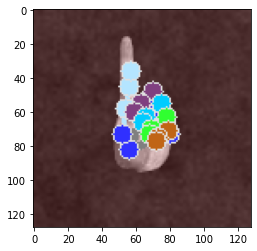

In [17]:
imagesGlob = 'images/test/*/*.png'
X, Y = np.empty((0, 128, 128, 3)), np.empty((0, 21, 2))
count_all = 0
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
with mp.solutions.hands.Hands(static_image_mode=True) as hands:
    for filename in glob.glob(imagesGlob)[:2]:
        count_all += 1
        print('\r' + str(count_all), end='')
        image = cv2.cvtColor(cv2.imread(filename, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
        image += np.array([30, 0, 0], dtype=np.uint8)
        results = hands.process(image)
        if results.multi_hand_landmarks:
            for hand_landmark in results.multi_hand_landmarks:
                features = np.empty((0, 2))
                drw = image.copy()
                mp_drawing.draw_landmarks(
                    drw,
                    hand_landmark,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style(),
                )
                plt.imshow(drw)
                for v in hand_landmark.landmark:
                    features = np.append(features, [[v.x, v.y]], axis=0)
            X = np.append(X, [image], axis=0)
            Y = np.append(Y, [features], axis=0)

In [ ]:
np.savez('keypoints1000', X=X, Y=Y)

In [25]:
loaded = np.load('keypoints1000.npz')
X, Y = loaded['X'], loaded['Y']

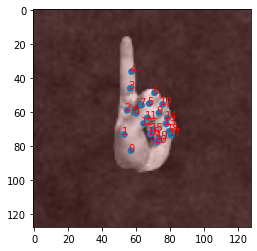

In [36]:
i = 0
fig, ax = plt.subplots(1)
ax.imshow(X[i]/255)
for i, c in enumerate((np.array(X[0].shape[:-1]) * Y[i]).tolist()):
    circ = Circle(c, 2)
    ax.text(c[0] - 1.5, c[1], i, color='red')
    ax.add_patch(circ)